In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pulp import *

## 7. Capital Budgeting

$$\text{NPV} = \sum^T_{t=1}\frac{c_t}{\left(1 + r\right)^t}$$

$$\$1 \text{ today}= \$\left(1 + r\right) \text{ a year from now}$$

In [ ]:
def NPV(c_t, r):
    return np.sum([c_t[i] / ((1 + r)**(i)) for i in range(len(c_t))])

***Example***<br>
For a discount rate of 15%, consider a project with the cash flows shown below:

Time|1|2|3|4|5|6|7
-|-|-|-|-|-|-|-
$\text{ }$|-400|200|600|-900|1000|250|230

- Compute project NPV if cash flows are at the end of the year.
- Compute project NPV if cash flows are at the beginning of the year.
- Compute project NPV if cash flows are at the middle of the year.

In [ ]:
cf = np.array([-400, 200, 600, -900, 1000, 250, 230])

a = f"${NPV(cf, 0.15):,.2f}"
b = f"${NPV(cf, 0.15) * 1.15:,.2f}"
c = f"${NPV(cf, 0.15) * (1.15 ** 0.5):,.2f}"

a, b, c

('$431.32', '$496.02', '$462.54')

$$\text{XNPV} = \sum_{t=0}^{T} \frac{c_t}{(1 + r)^{\frac{d_t - d_0}{365}}}$$


In [ ]:
def XNPV(c_t, r):
    dates = list(c_t.keys())
    return np.sum([c / (1 + r) ** (((dates[i] - dates[0]).days)/365) for i, c in enumerate(c_t.values())])

***Example***<br>
| Date    | Cash Flow |
|---------|-----------|
| 4/8/01  | -900      |
| 8/15/01 | 300       |
| 1/15/02 | 400       |
| 6/25/02 | 200       |
| 7/3/03  | 100       |


In [ ]:
dates = [
    "2001-04-08",
    "2001-08-15",
    "2002-01-15",
    "2002-06-25",
    "2003-07-03"
]

dates = [pd.Timestamp(d) for d in dates]
cashflow = [-900, 300, 400, 200, 100]
c_t = dict(zip(dates, cashflow))

f"${XNPV(c_t, 0.1):,.2f}"

'$20.63'

Star Oil Company is considering five different investment opportunities. The cash outflows and net present values (in millions of dollars) are given in Table 7. Star Oil has \$40 million available for investment now (time 0); it estimates that one year from now (time 1) \$20 million will be available for investment. Star Oil may purchase any fraction of each investment. In this case, the cash outflows and NPV are adjusted accordingly. For example, if Star Oil purchases one-fifth of investment 3, then a cash outflow of $\frac{1}{5}(5)$ = \$1 million would be required at time 0, and a cash outflow of $\frac{1}{5}(5)$ = \$1 million would be required at time 1. The one-fifth share of investment 3 would yield an NPV of $\frac{1}{5}(16)$ = \$3.2 million. Star Oil wants to maximize the NPV that can be obtained by investing in investments 1–5. Formulate an LP that will help achieve this goal. Assume that any funds left over at time 0 cannot be used at time 1.

|                       | Investment 1 | Investment 2 | Investment 3 | Investment 4 | Investment 5 |
|-----------------------|--------------|--------------|--------------|--------------|--------------|
| Time 0 cash outflow   | 11           | 53           | 5            | 5            | 29           |
| Time 1 cash outflow   | 3            | 6            | 5            | 1            | 34           |
| NPV                   | 13           | 16           | 16           | 14           | 39           |


\begin{aligned}
\max        &&  13x_1 + 16x_2 + 16x_3 + 14x_4 + 39x_5\\
\text{s.t.} &&  11x_1 + 53x_2 + 5x_3 + 5x_4 + 29x_5 &\le 40\\
            &&  3x_1 + 6x_2 + 5x_3 + x_4 + 34x_5 &\le 20\\
            && x_1,x_2,x_3,x_4,x_5                &\ge 0\\
            && x_1,x_2,x_3,x_4,x_5                &\le 1
\end{aligned}

In [ ]:
t0 = [11, 53, 5, 5, 29]
t1 = [3, 6, 5, 1, 34]
npv = [13, 16, 16, 14, 39]

model = LpProblem("max_npv", LpMaximize)

x = LpVariable.dicts("x", range(len(t0)), lowBound=0, cat="Continuous")

model += lpSum([npv[i] * x[i] for i in range(len(x))])

model += lpSum([t0[i] * x[i] for i in range(len(x))]) <= 40
model += lpSum([t1[i] * x[i] for i in range(len(x))]) <= 20

for i in range(len(x)):
    model += x[i] <= 1

model.solve()

if model.status == 1:
    for k, v in x.items():
        print(f"Investment {k+1} = {v.varValue*100:,.2f}%")
    print()
    print("time 0:", [f"${t0[i] * x[i].varValue:,.3f}M" for i in range(len(x))])
    print("time 1:", [f"${t1[i] * x[i].varValue:,.3f}M" for i in range(len(x))])
    print("NPV:", [f"${npv[i] * x[i].varValue:,.3f}M" for i in range(len(x))])
    print()
    print(f"Total NPV: ${model.objective.value():,.3f}M")

Investment 1 = 100.00%
Investment 2 = 20.09%
Investment 3 = 100.00%
Investment 4 = 100.00%
Investment 5 = 28.81%

time 0: ['$11.000M', '$10.646M', '$5.000M', '$5.000M', '$8.354M']
time 1: ['$3.000M', '$1.205M', '$5.000M', '$1.000M', '$9.795M']
NPV: ['$13.000M', '$3.214M', '$16.000M', '$14.000M', '$11.235M']

Total NPV: $57.449M


### Problems

1. Two investments with varying cash flows (in thousands of dollars) are available, as shown in Table 8. At time 0, \$10,000 is available for investment, and at time 1, \$7,000 is available. Assuming that $r = 0.10$, set up an LP whose solution maximizes the NPV obtained from these investments. Graphically find the optimal solution to the LP.

$i$|$C_0$|$C_1$|$C_2$|$C_3$|NPV
-|-|-|-|-|-|
1|-6|-6|7|9|$N_1$
2|-8|-3|9|7|$N_2$


\begin{aligned}
\max                &&  x_1N_1 + x_2N_2\\
\text{s.t.}         &&  6x_1 + 8x_2 &\le 10\\
                    && 6x_1 + 3x_2 &\le 7\\[10pt]
\text{where}        && N_i = \sum^3_{t=0}\frac{C_{ti}}{\left(1 + 0.10 \right)^t}
\end{aligned}

In [ ]:
t1 = [-6, -6, 7, 9]
t2 = [-8, -3, 9, 7]

r = 0.1
N1 = NPV(t1, r)
N2 = NPV(t2, r)

model = LpProblem("max_npv", LpMaximize)

x = LpVariable.dicts("x", [0, 1], lowBound=0, upBound=1, cat="Continuous")

model += x[0] * N1 + x[1] * N2

model += lpSum(6*x[0] + 8*x[1]) <= 10
model += lpSum(6*x[0] + 3*x[1]) <= 7

model.solve()

optimal_solution = []
if model.status == 1:
    for k, v in x.items():
        print(f"Investment {k+1} = {v.varValue*100:,.2f}%")
        optimal_solution.append(v.varValue)
    print(f"NPV: ${model.objective.value():,.2f}")

Investment 1 = 33.33%
Investment 2 = 100.00%
NPV: $2.33


(0.0, 1.0)

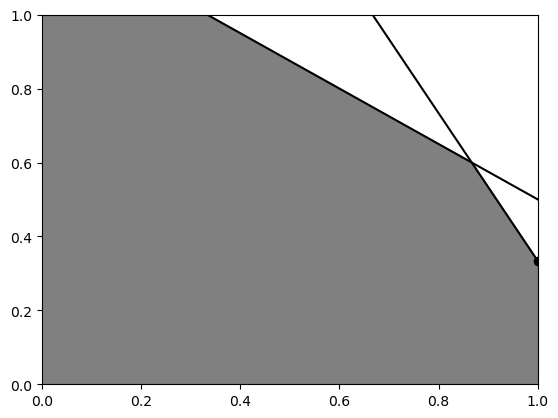

In [ ]:
def const_1(x):
    return (-6/8)*x + (10/8)

def const_2(x):
    return (-6/3)*x + (7/3)

x = np.linspace(0, 1, 1000)

plt.plot(x, const_2(x), color="k")
plt.plot(x, const_1(x), color="k")

plt.fill_between(x, const_1(x), where=const_1(x) < const_2(x), color='grey')
plt.fill_between(x, const_2(x), where=const_1(x) > const_2(x), color='grey')
plt.scatter(optimal_solution[1], optimal_solution[0], color="k", label=tuple(optimal_solution))

plt.xlim(0, 1)
plt.ylim(0, 1)

3. SemiCond is a small electronics company that manufactures tape recorders and radios. The per-unit labor costs, raw material costs, and selling price of each product are given below. On December 1, 2002, SemiCond has available raw material that is sufficient to manufacture 100 tape recorders and 100 radios. On the same date, the company’s balance sheet is as shown below and SemiCond’s asset-liability ratio (called the current ratio) is 20,000/10,000 = 2. <br><br>SemiCond must determine how many tape recorders and radios should be produced during December. Demand is large enough to ensure that all goods produced will be sold. All sales are on credit, however, and payment for goods produced in December will not be received until February 1, 2003. During December, SemiCond will collect $2,000 in accounts receivable, and SemiCond must pay off $1,000 of the outstanding loan and a monthly rent of $1,000. On January 1, 2003, SemiCond will receive a shipment of raw material worth $2,000, which will be paid for on February 1, 2003. SemiCond’s management has decided that the cash balance on January 1, 2003, must be at least $4,000. Also, SemiCond’s bank requires that the current ratio at the beginning of January be at least 2. To maximize the contribution to profit from December production, (revenues to be received) - (variable production costs), what should SemiCond produce during December?

|               | Tape Recorder | Radio |
|---------------|--------------:|------:|
| Selling price |         $100  |  $90  |
| Labor cost    |         $50   |  $35  |
| Raw material cost |     $30   |  $40  |

<br>

| Assets           |      | Liabilities      |      |
|------------------|------|------------------|------|
| Cash             | $10,000 | Bank loan       | $10,000 |
| Accounts receivable | $3,000  |                  |        |
| Inventory        | $7,000  |                  |        |

\begin{aligned}
\text{ } && 12/01/02 \hspace{10pt} && 12/01/02 - 01/01/03 \hspace{10pt} && 01/01/03\\[10pt]
\hline\\
\text{ASSETS}\\
\text{Cash} && 10,000 \hspace{10pt} && +2,000 - 1,000 - 1,000 - 50x_1 - 35x_2 \hspace{10pt} && 10,000 - 50x_1 - 35x_2\\
\text{Accounts Receivable} && 3,000 \hspace{10pt} && +100x_1 + 90x_2 - 2,000 \hspace{10pt} && 1,000 + 100x_1 + 90x_2\\
\text{Inventory} && 7,000 \hspace{10pt} && +2,000 - 30x_1 - 40x_2 \hspace{10pt} && 9,000 - 30x_1 - 40x_2\\[10pt]
\text{Total Assets} &&&&&& 20,000 + 20x_1 + 15x_2\\
\\
\hline\\
\text{LIABILITIES}\\
\text{Bank Loan} && 10,000 \hspace{10pt} && -1,000 \hspace{10pt} && 9,000\\
\text{Accounts Payable} && \quad \hspace{10pt} && +2,000 \hspace{10pt} && 2,000\\[10pt]
\text{Total Liabilities} &&&&&& 11,000
\end{aligned}

\begin{aligned}
\text{Cash}_{F}: && 10,000 - 50x_1 - 35x_2 \ge 4,000\\
\rightarrow     && 50x_1 + 35x_2 \le 6,000
\\
\\
\text{CR}_{F}: && 20,000 + 20x_1 + 15x_2 \ge 2\left(11,000\right)\\
\rightarrow     && 20x_1 + 15x_2 \ge 2,000
\\
\\
C: && (100 - 50 - 30)x_1 + (90 - 35 - 40)x_2\\
\rightarrow     &&  20x_1 + 15x_2
            
\end{aligned} 

\begin{aligned}
\max        &&  C =  20x_1 + 15x_2\\
\text{s.t.} &&  50x_1 + 35x_2 &\le 6,000\\
            &&  20x_1 + 15x_2 &\ge 2,000\\
            &&  x_1, x_2 &\le 100\\
            &&  x_1, x_2 &\in \mathbb{Z}^+
\end{aligned}

In [ ]:
x = LpVariable.dicts("x", [1, 2], lowBound=0, cat="Integer")

model = LpProblem("max_cont", LpMaximize)

model += 20 * x[1] + 15 * x[2]

model += 50 * x[1] + 35 * x[2] <= 6000
model += 20 * x[1] + 15 * x[2] >= 2000

for i in x:
    model += x[i] <= 100

model.solve()

if model.status == 1:
    for k, v in x.items():
        print(f"{k} = {v.varValue}")

1 = 50.0
2 = 100.0
